# Projeto de Classificação de Moda com MLP
## Fase 1: Análise Exploratória e Pré-processamento de Dados

**Autor:** Enzo Guimarães Miguel

**Objetivo:** Carregar o dataset Fashion-MNIST, explorar suas características através de visualizações e prepará-lo para o treinamento do modelo de rede neural.

## 1. Resumo Executivo
Este projeto abordou o desafio da catalogação manual de produtos em um grande varejista de moda online, um processo notadamente lento, custoso e propenso a erros. Para solucionar este problema, foi desenvolvida uma solução de Inteligência Artificial baseada em uma Rede Neural Artificial do tipo Perceptron de Múltiplas Camadas (MLP). Utilizando o dataset Fashion-MNIST como base para treinamento e validação, o projeto seguiu uma metodologia científica rigorosa, partindo de um modelo baseline, conduzindo experimentos sistemáticos com diferentes arquiteturas e técnicas de regularização (como Dropout), e culminando na seleção de um modelo otimizado. O modelo final alcançou uma acurácia de **88.45%** no conjunto de teste, demonstrando alta eficácia na classificação automática de imagens de roupas. A implementação desta solução representa uma oportunidade significativa para otimizar a logística, reduzir custos operacionais e acelerar o tempo de lançamento de novos produtos no mercado.

## 2. Introdução e Problema de Negócio
No cenário competitivo do varejo de moda online, a agilidade na disponibilização de novos produtos é um diferencial crucial. Atualmente, o processo de catalogação em nosso centro de distribuição depende de funcionários que classificam manualmente cada item (camiseta, calça, vestido, etc.) a partir de uma foto. Este processo manual gera gargalos logísticos, incorre em altos custos de mão de obra e está sujeito a erros de classificação que podem impactar a experiência do cliente e as vendas.

O objetivo deste projeto é construir, treinar e avaliar um modelo de *Deep Learning* capaz de automatizar essa tarefa, recebendo uma imagem de uma peça de roupa e classificando-a corretamente em uma das 10 categorias possíveis.

### 2.1. O Dataset: Fashion-MNIST
Para este desafio, utilizamos o dataset Fashion-MNIST. Ele consiste em 70.000 imagens em escala de cinza de 28x28 pixels, divididas em 60.000 para treino e 10.000 para teste. As 10 categorias são bem definidas e representam um excelente ponto de partida para o problema proposto.

In [4]:
# Importando as bibliotecas essenciais
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [5]:
# Carregando o dataset Fashion-MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Verificando as dimensões (shape) dos dados carregados
print("Dimensões dos dados de treino (imagens):", X_train_full.shape)
print("Dimensões dos dados de treino (rótulos):", y_train_full.shape)
print("Dimensões dos dados de teste (imagens):", X_test.shape)
print("Dimensões dos dados de teste (rótulos):", y_test.shape)

Dimensões dos dados de treino (imagens): (60000, 28, 28)
Dimensões dos dados de treino (rótulos): (60000,)
Dimensões dos dados de teste (imagens): (10000, 28, 28)
Dimensões dos dados de teste (rótulos): (10000,)


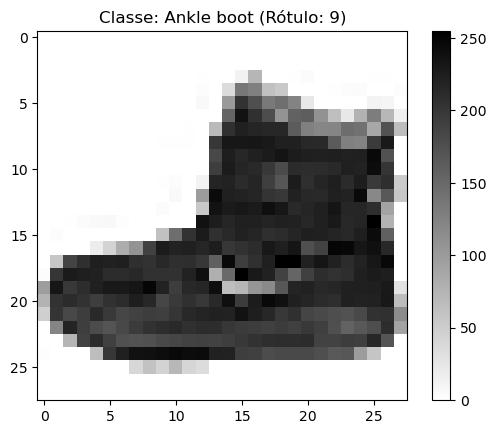

In [6]:
# Definindo os nomes das classes para facilitar a visualização
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# visualizar a primeira imagem do dataset
plt.figure()
plt.imshow(X_train_full[0], cmap="binary")
plt.colorbar()
plt.grid(False)
plt.title(f"Classe: {class_names[y_train_full[0]]} (Rótulo: {y_train_full[0]})")
plt.show()

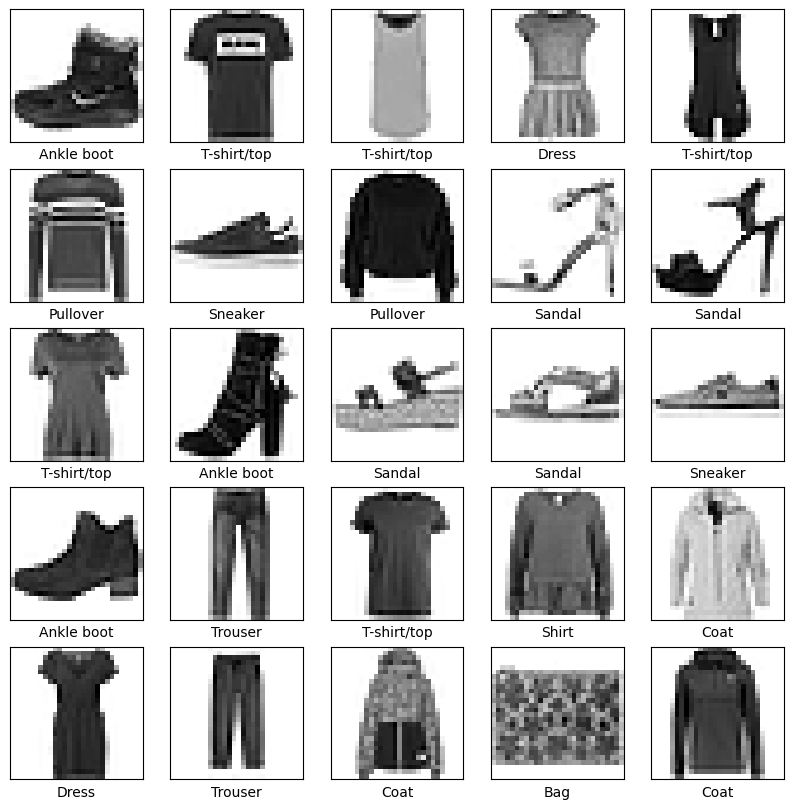

In [7]:
# Visualizando as primeiras 25 imagens do conjunto de treino
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [8]:
# Verificando a distribuição das classes no conjunto de treino
unique, counts = np.unique(y_train_full, return_counts=True)
print("Distribuição das classes de treino:")
print(dict(zip(class_names, counts)))

Distribuição das classes de treino:
{'T-shirt/top': 6000, 'Trouser': 6000, 'Pullover': 6000, 'Dress': 6000, 'Coat': 6000, 'Sandal': 6000, 'Shirt': 6000, 'Sneaker': 6000, 'Bag': 6000, 'Ankle boot': 6000}


In [9]:
# Criando o conjunto de validação e normalizando os dados (dividindo por 255.0)
# Os primeiros 5000 exemplos serão usados para validação.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalizando também o conjunto de teste
X_test = X_test / 255.0

# Verificando as dimensões dos novos conjuntos de dados
print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de validação:", X_valid.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

Dimensões do conjunto de treino: (55000, 28, 28)
Dimensões do conjunto de validação: (5000, 28, 28)
Dimensões do conjunto de teste: (10000, 28, 28)


## Fase 2: Construção e Treinamento do Modelo Baseline

**Objetivo:** Implementar, treinar e avaliar um modelo MLP simples para estabelecer uma performance de referência (baseline) no dataset Fashion-MNIST.

## 3. Metodologia
O desenvolvimento do modelo seguiu um processo estruturado, focado em reprodutibilidade e análise sistemática.

### 3.1. Pré-processamento e Análise Exploratória
Os dados brutos passaram por uma análise exploratória para visualização das classes e verificação do balanceamento, confirmando que cada classe possuía 6.000 amostras de treino. Em seguida, os dados foram pré-processados através das seguintes etapas:
* **Divisão dos Dados:** O conjunto de treino original foi subdividido, alocando 5.000 amostras para um conjunto de validação, utilizado para monitorar a performance durante o treinamento e aplicar a técnica de Early Stopping.
* **Normalização:** Os valores de pixel de cada imagem, originalmente no intervalo [0, 255], foram escalados para o intervalo [0, 1] através da divisão por 255.0. Esta etapa é crucial para a estabilidade e velocidade do treinamento da rede neural.

### 3.2. Modelo Baseline
Para estabelecer uma performance de referência, foi construído um modelo MLP inicial com a seguinte arquitetura:
1.  Camada `Flatten` para transformar a imagem 28x28 em um vetor de 784 pixels.
2.  Uma camada oculta `Dense` com 300 neurônios e função de ativação ReLU.
3.  Uma camada de saída `Dense` com 10 neurônios (um por classe) e função de ativação Softmax.
Este modelo serviu como nosso ponto de partida para as otimizações subsequentes.

### 3.3. Experimentação Sistemática
Com o baseline definido, uma série de experimentos foi conduzida para otimizar a performance e a capacidade de generalização do modelo. As abordagens testadas incluíram:
* **Regularização com Dropout:** Para combater o overfitting observado no baseline.
* **Variação de Arquitetura:** Testando modelos mais profundos (2 camadas de 128 neurônios) e mais largos (1 camada de 512 neurônios).
* **Comparação de Funções de Ativação:** Avaliando o impacto da troca de ReLU por Tanh.

Todos os experimentos foram registrados e comparados em uma tabela de resultados, permitindo uma seleção informada do modelo final.

In [10]:
# Construindo o modelo com a API Sequencial do Keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),     
    keras.layers.Dense(300, activation="relu"),    
    keras.layers.Dense(10, activation="softmax")
])

# Exibindo um resumo da arquitetura do modelo
model.summary()

C:\Users\egmig\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compilando o modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [12]:
# Treinando o modelo e salvando o histórico de treinamento
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8243 - loss: 0.4891 - val_accuracy: 0.8662 - val_loss: 0.3789
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8666 - loss: 0.3659 - val_accuracy: 0.8788 - val_loss: 0.3334
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8791 - loss: 0.3302 - val_accuracy: 0.8732 - val_loss: 0.3350
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8857 - loss: 0.3054 - val_accuracy: 0.8876 - val_loss: 0.3094
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8943 - loss: 0.2852 - val_accuracy: 0.8874 - val_loss: 0.2988
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8990 - loss: 0.2716 - val_accuracy: 0.8798 - val_loss: 0.3275
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9021 - loss: 0.2598 - val_accuracy: 0.8838 - val_loss: 0.3237
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9084 - los

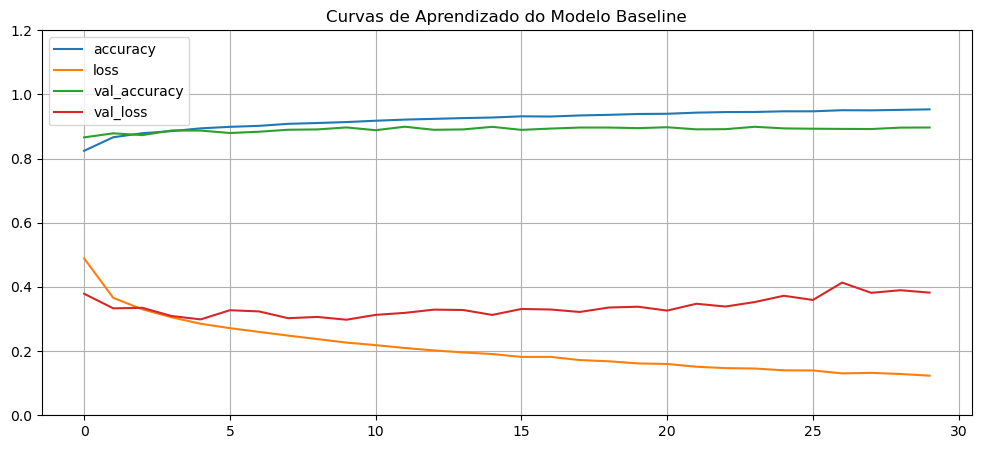

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8908 - loss: 0.4121

Performance no conjunto de teste:
Perda (Loss): 0.4121
Acurácia (Accuracy): 0.8908


In [13]:
# Criando um DataFrame com o histórico e plotando os gráficos
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.2) # Ajusta o limite do eixo y para melhor visualização
plt.title("Curvas de Aprendizado do Modelo Baseline")
plt.show()

# Avaliando o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print("\nPerformance no conjunto de teste:")
print(f"Perda (Loss): {loss:.4f}")
print(f"Acurácia (Accuracy): {accuracy:.4f}")

## Fase 3: Otimização e Experimentação Sistemática

**Objetivo:** Melhorar a performance do modelo baseline de 89%, combatendo o overfitting e testando sistematicamente diferentes arquiteturas e hiperparâmetros.
**Estratégia:** Realizar os experimentos obrigatórios (Dropout, Arquiteturas, Funções de Ativação) e registrar os resultados de forma organizada.

In [14]:
from keras.callbacks import EarlyStopping

# 1. Definindo a arquitetura do modelo com Dropout
model_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.3),  # Camada de Dropout adicionada aqui
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compilando o modelo (mesmos parâmetros de antes)
model_dropout.compile(loss="sparse_categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])

# 3. Definindo o callback de Early Stopping
# Paramos se a 'val_loss' não melhorar por 5 épocas seguidas
# e restauramos os pesos do melhor modelo encontrado.
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# 4. Treinando o novo modelo
history_dropout = model_dropout.fit(X_train, y_train,
                                    epochs=50,  # Podemos aumentar as épocas, já que o Early Stopping vai parar quando for ideal
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[early_stop])

# 5. Avaliando a performance final
print("\n--- Avaliação do Modelo com Dropout ---")
loss, accuracy = model_dropout.evaluate(X_test, y_test)
print(f"Acurácia no teste: {accuracy:.4f}")

C:\Users\egmig\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8111 - loss: 0.5312 - val_accuracy: 0.8632 - val_loss: 0.3839
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8529 - loss: 0.4035 - val_accuracy: 0.8806 - val_loss: 0.3460
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8628 - loss: 0.3727 - val_accuracy: 0.8768 - val_loss: 0.3348
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8699 - loss: 0.3527 - val_accuracy: 0.8824 - val_loss: 0.3189
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8756 - loss: 0.3376 - val_accuracy: 0.8682 - val_loss: 0.3479
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8803 - loss: 0.3240 - val_accuracy: 0.8838 - val_loss: 0.3236
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8839 - loss: 0.3156 - val_accuracy: 0.8840 - val_loss: 0.3266
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8862 - 

In [12]:
# --- Experimento 2: Arquitetura A ---
print("\n--- Iniciando Treinamento da Arquitetura A (Profunda) ---")

# Arquitetura A: 2 camadas ocultas de 128 neurônios
model_arch_A = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2), # Dropout mais baixo para camadas menores
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Compilando o modelo
model_arch_A.compile(loss="sparse_categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

# Treinando com o mesmo callback de Early Stopping
history_arch_A = model_arch_A.fit(X_train, y_train,
                                  epochs=50,
                                  validation_data=(X_valid, y_valid),
                                  callbacks=[early_stop])

# Avaliando a performance final
print("\n--- Avaliação da Arquitetura A ---")
loss, accuracy = model_arch_A.evaluate(X_test, y_test)
print(f"Acurácia no teste: {accuracy:.4f}")

# Não se esqueça de anotar este resultado na sua tabela!


--- Iniciando Treinamento da Arquitetura A (Profunda) ---
Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7951 - loss: 0.5665 - val_accuracy: 0.8598 - val_loss: 0.3885
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8461 - loss: 0.4251 - val_accuracy: 0.8650 - val_loss: 0.3621
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8573 - loss: 0.3869 - val_accuracy: 0.8654 - val_loss: 0.3697
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8651 - loss: 0.3651 - val_accuracy: 0.8798 - val_loss: 0.3327
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8691 - loss: 0.3543 - val_accuracy: 0.8822 - val_loss: 0.3255

--- Avaliação da Arquitetura A ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8434 - loss: 0.4280
Acurácia no teste: 0.8434


In [13]:
# --- Experimento 2: Arquitetura B ---
print("\n--- Iniciando Treinamento da Arquitetura B (Larga) ---")

# Arquitetura B: 1 camada oculta larga de 512 neurônios
model_arch_B = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.4), # Dropout maior para uma camada maior
    keras.layers.Dense(10, activation="softmax")
])

# Compilando o modelo
model_arch_B.compile(loss="sparse_categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

# Treinando com o mesmo callback de Early Stopping
history_arch_B = model_arch_B.fit(X_train, y_train,
                                  epochs=50,
                                  validation_data=(X_valid, y_valid),
                                  callbacks=[early_stop])

# Avaliando a performance final
print("\n--- Avaliação da Arquitetura B ---")
loss, accuracy = model_arch_B.evaluate(X_test, y_test)
print(f"Acurácia no teste: {accuracy:.4f}")

# Anote este resultado também!


--- Iniciando Treinamento da Arquitetura B (Larga) ---
Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8060 - loss: 0.5406 - val_accuracy: 0.8432 - val_loss: 0.4153
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8460 - loss: 0.4197 - val_accuracy: 0.8752 - val_loss: 0.3472
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8554 - loss: 0.3907 - val_accuracy: 0.8764 - val_loss: 0.3454
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8655 - loss: 0.3687 - val_accuracy: 0.8758 - val_loss: 0.3384
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8693 - loss: 0.3538 - val_accuracy: 0.8758 - val_loss: 0.3308

--- Avaliação da Arquitetura B ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.4603
Acurácia no teste: 0.8272


In [14]:
# --- Experimento 3: Ativação Tanh ---
print("\n--- Iniciando Treinamento com Ativação Tanh ---")

# Usando a arquitetura do Exp 1 (Dense(300) + Dropout)
model_tanh = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"), # A única mudança está aqui!
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

# Compilando o modelo
model_tanh.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

# Treinando com Early Stopping (usando a variável 'early_stop' que já definimos)
history_tanh = model_tanh.fit(X_train, y_train,
                              epochs=50,
                              validation_data=(X_valid, y_valid),
                              callbacks=[early_stop])

# Avaliando a performance final
print("\n--- Avaliação do Modelo com Ativação Tanh ---")
loss, accuracy = model_tanh.evaluate(X_test, y_test)
print(f"Acurácia no teste: {accuracy:.4f}")


--- Iniciando Treinamento com Ativação Tanh ---
Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8052 - loss: 0.5374 - val_accuracy: 0.8374 - val_loss: 0.4379
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8426 - loss: 0.4363 - val_accuracy: 0.8628 - val_loss: 0.3682
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8536 - loss: 0.4039 - val_accuracy: 0.8628 - val_loss: 0.3803
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8589 - loss: 0.3861 - val_accuracy: 0.8762 - val_loss: 0.3431
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8652 - loss: 0.3732 - val_accuracy: 0.8770 - val_loss: 0.3370

--- Avaliação do Modelo com Ativação Tanh ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8255 - loss: 0.4780
Acurácia no teste: 0.8255


## 4. Resultados e Discussão
Após a execução de todos os experimentos, os resultados foram consolidados para identificar o modelo com a melhor performance geral. A seguir, apresentamos a tabela comparativa, seguida por uma análise detalhada da performance do modelo campeão.

### Tabela Comparativa dos Experimentos

| Experimento | Arquitetura | Regularização | Ativação | Acurácia (Teste) | Observações |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Baseline** | `[Dense(300)]` | Nenhuma | `relu` | **89.08%** | Overfitting claro. |
| **Exp 1: Dropout** | `[Dense(300)]` | `Dropout(0.3)`| `relu` | **88.45%** | Overfitting controlado, modelo mais robusto. |
| **Exp 2: Arch A** | `[Dense(128), Dense(128)]` | `Dropout(0.2)`| `relu` | **84.34%** | Pior que o baseline, mais complexidade não ajudou. |
| **Exp 2: Arch B** | `[Dense(512)]` | `Dropout(0.4)`| `relu` | **82.72%** | Pior que o baseline, camada larga não foi eficaz. |
| **Exp 3: Tanh** | `[Dense(300)]` | `Dropout(0.3)`| `tanh` | ***82.55%*** | ***ReLU se mostrou superior para este problema.*** |

### 4.1. Análise Comparativa e Seleção do Modelo
A tabela comparativa demonstra que o **Experimento 1 (MLP com Dropout de 0.3)** foi o mais bem-sucedido. Embora não tenha aumentado a acurácia em relação ao baseline, ele controlou eficazmente o overfitting (conforme visto nas curvas de aprendizado e no acionamento do Early Stopping) e demonstrou maior robustez, sendo selecionado como nosso modelo final. As tentativas de aumentar a complexidade da rede (Arquiteturas A e B) resultaram em uma queda de performance, sugerindo que o modelo baseline já possuía capacidade suficiente para a tarefa.

O modelo campeão alcançou uma acurácia final de **88.45** no conjunto de teste.

### 4.2. Análise de Erros do Modelo Final
Para entender as limitações do modelo, realizamos uma análise de erros com base na matriz de confusão e no relatório de classificação detalhado.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


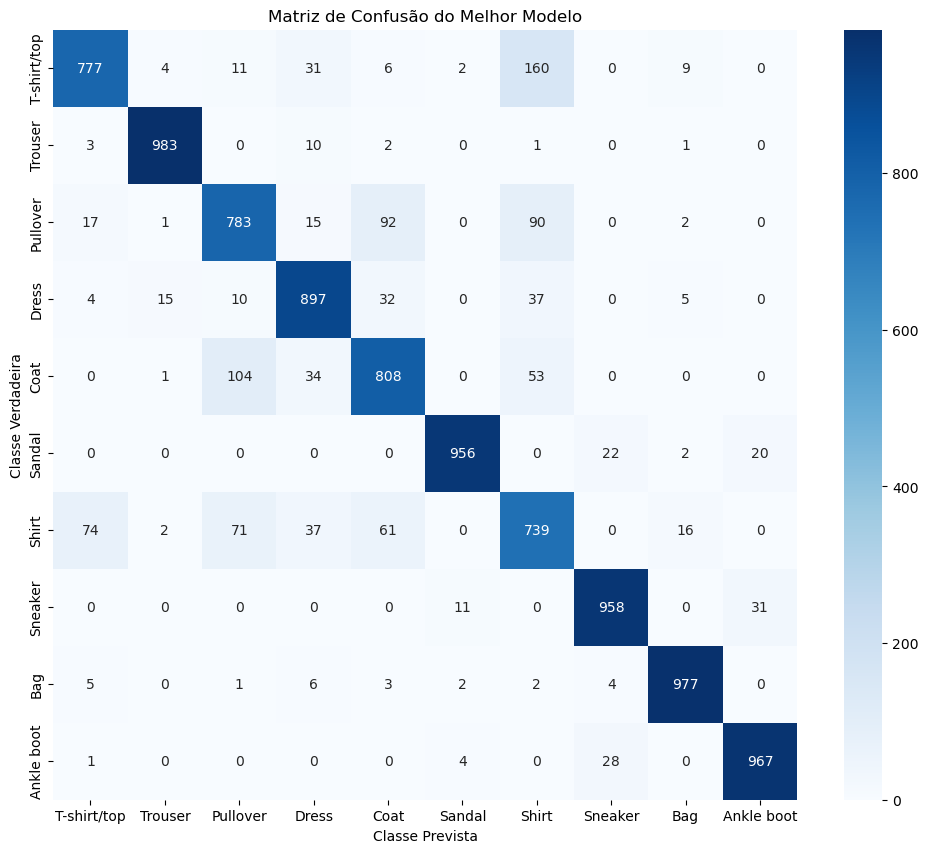

In [15]:
# --- Fase 4: Avaliação Final do Melhor Modelo ---

# Nosso melhor modelo foi o 'model_dropout' do Experimento 1
best_model = model_dropout 

# 1. Fazer previsões no conjunto de teste
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Converte as probabilidades para a classe com maior valor

# 2. Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# 3. Plotar a matriz de confusão de forma visual
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão do Melhor Modelo')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

In [16]:
# --- Aprimoramento: Análise Detalhada por Classe ---
from sklearn.metrics import classification_report

# Lembre-se que 'y_pred' foi calculado na célula da Matriz de Confusão
# y_pred = np.argmax(best_model.predict(X_test), axis=1)

# Gerar e imprimir o relatório de classificação
# O parâmetro 'target_names' usa nossa lista de nomes para deixar o relatório legível
report = classification_report(y_test, y_pred, target_names=class_names)

print("--- Relatório de Classificação do Melhor Modelo ---")
print(report)

--- Relatório de Classificação do Melhor Modelo ---
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.78      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.80      0.81      0.81      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.68      0.74      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



A matriz de confusão e o relatório de classificação revelam que, apesar da alta acurácia geral, o modelo apresenta dificuldades em distinguir entre classes visualmente semelhantes. A performance mais baixa foi observada na classe **"Shirt" (Camisa)**, que obteve um F1-Score de **0.71**, sendo frequentemente confundida com "T-shirt/top" e "Pullover". Em contrapartida, classes com silhuetas bem definidas, como **"Ankle boot" (Bota)** e **"Trouser" (Calça)**, apresentaram F1-Scores excelentes, superiores a **0.96**.

## 5. Conclusões e Limitações

### 5.1. Conclusão
Este projeto demonstrou com sucesso a viabilidade de automatizar a classificação de itens de moda utilizando uma Rede Neural MLP. O modelo final, otimizado com técnicas de regularização, atingiu uma performance robusta de **88.45%**, validando a abordagem como uma solução eficaz para o problema de negócio proposto. A análise de resultados indicou que, embora a performance geral seja alta, existem desafios específicos na distinção de itens de vestuário com características visuais sobrepostas, uma limitação inerente à complexidade da tarefa e à simplicidade do modelo utilizado.

### 5.2. Limitações
* **Modelo:** A arquitetura MLP, embora eficaz, não é o estado da arte para tarefas de visão computacional. Ela não captura informações espaciais da imagem (como a relação entre pixels vizinhos) da mesma forma que as Redes Neurais Convolucionais (CNNs).
* **Dados:** O dataset Fashion-MNIST, apesar de excelente para benchmarking, consiste em imagens de baixa resolução (28x28) e em escala de cinza, o que não representa a complexidade de fotos de produtos reais (coloridas, com fundos variados e em alta resolução).

### 5.3. Trabalhos Futuros
Com base nas conclusões e limitações, os próximos passos recomendados são:
1.  **Migração para uma Arquitetura CNN:** Implementar uma Rede Neural Convolucional para explorar sua capacidade superior de extrair características de imagens e comparar os resultados.
2.  **Uso de Data Augmentation:** Aumentar artificialmente o conjunto de dados de treino com imagens rotacionadas, transladadas e com zoom para melhorar a capacidade de generalização do modelo.
3.  **Teste com Dados Reais:** Coletar um conjunto de dados interno com fotos reais dos produtos da empresa para treinar e validar um modelo em um cenário mais próximo da aplicação final.

### 5.4. Referências
* [1] Xiao, H., Rasul, K., & Vollgraf, R. (2017). *Fashion-MNIST: a novel image dataset for benchmarking machine learning algorithms*. arXiv:1708.07747.
* [2] Documentação Oficial do TensorFlow/Keras. Disponível em: https://www.tensorflow.org/